In [56]:
%matplotlib inline
import math
import re
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import re

from collections import defaultdict
from scipy.stats import pearsonr
import pandas as pd
from IPython.display import display


In [57]:
DATA_DIR = r"Y:\Studium\3. Sem UniPI\Data Analytics 4 digital Health\Data"

DATASETS = {
    "heart_diagnoses_1": "heart_diagnoses_1.csv",
    "laboratory_events_codes_2": "laboratory_events_codes_2.csv",
    "microbiology_events_codes_3": "microbiology_events_codes_3.csv",
    "procedure_code_4": "procedure_code_4.csv",
}
name = "laboratory_events_codes_2"

In [58]:
df = pd.read_csv(f"{DATA_DIR}/{DATASETS[name]}", index_col=False)

df.columns

Index(['hadm_id', 'charttime', 'value', 'valuenum', 'valueuom',
       'ref_range_lower', 'ref_range_upper', 'flag', 'label', 'fluid',
       'examination_group', 'analysis_batch_id', 'qc_flag', 'ref_range'],
      dtype='object')

# INspections

## A

In [7]:
df.head(10)

,hadm_id,charttime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,label,fluid,examination_group,analysis_batch_id,qc_flag,ref_range
0,29654838.0,2188-01-04 23:43:00,___,198.00,IU/L,29.0,201.00,NaN,Creatine Kinase (CK),Blood,Cardiac Markers,BATCH_218801_N3,OK,NaN
1,29654838.0,2188-01-04 23:43:00,5,5.00,ng/mL,0.0,10.00,NaN,"Creatine Kinase, MB Isoenzyme",Blood,Cardiac Markers,BATCH_218801_C7,OK,NaN
2,29654838.0,2188-01-04 23:43:00,___,0.03,ng/mL,0.0,0.01,abnormal,Troponin T,Blood,Cardiac Markers,BATCH_218801_R4,OK,NaN
3,29654838.0,2188-01-05 06:56:00,1.2,1.20,NaN,0.9,1.10,abnormal,INR(PT),Blood,Coagulation and Hemostasis,BATCH_218801_K7,OK,NaN
4,29654838.0,2188-01-05 06:56:00,12.8,12.80,sec,9.4,12.50,abnormal,PT,Blood,Coagulation and Hemostasis,BATCH_218801_B1,WARN,NaN
5,29654838.0,2188-01-05 06:56:00,85.8,85.80,sec,25.0,36.50,abnormal,PTT,Blood,Coagulation and Hemostasis,BATCH_218801_R1,OK,NaN
6,29654838.0,2188-01-05 06:56:00,___,8.10,%,4.8,5.90,abnormal,% Hemoglobin A1c,Blood,HbA1c,BATCH_218801_O1,OK,Normal range: 70-110
7,29654838.0,2188-01-05 06:56:00,___,186.00,mg/dL,91.0,123.00,abnormal,eAG,Blood,HbA1c,BATCH_218801_P4,OK,NaN
8,29654838.0,2188-01-05 06:56:00,19,19.00,mEq/L,8.0,20.00,NaN,Anion Gap,Blood,Renal Function Tests,BATCH_218801_O5,OK,NaN
9,29654838.0,2188-01-05 06:56:00,20,20.00,mEq/L,22.0,32.00,abnormal,Bicarbonate,Blood,BMP,BATCH_218801_A1,OK,NaN


In [8]:
df.tail(10)

,hadm_id,charttime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,label,fluid,examination_group,analysis_batch_id,qc_flag,ref_range
978493,21557581.0,2145-08-02 08:30:00,29.9,29.90,%,34.0,45.0,abnormal,Hematocrit,Blood,Complete Blood Count (CBC),BATCH_214508_Y8,OK,Normal range: 70-110
978494,21557581.0,2145-08-02 08:30:00,9.9,9.90,g/dL,11.2,15.7,abnormal,Hemoglobin,Blood,Complete Blood Count (CBC),BATCH_214508_D7,OK,NaN
978495,21557581.0,2145-08-02 08:30:00,30.4,30.40,pg,26.0,32.0,NaN,MCH,Blood,Complete Blood Count (CBC),BATCH_214508_J8,WARN,NaN
978496,21557581.0,2145-08-02 08:30:00,33.1,33.10,g/dL,32.0,37.0,NaN,MCHC,Blood,Complete Blood Count (CBC),BATCH_214508_O5,OK,NaN
978497,21557581.0,2145-08-02 08:30:00,92,92.00,fL,82.0,98.0,NaN,MCV,Blood,Complete Blood Count (CBC),BATCH_214508_M3,OK,NaN
978498,21557581.0,2145-08-02 08:30:00,180,180.00,K/uL,150.0,400.0,NaN,Platelet Count,Blood,Complete Blood Count (CBC),BATCH_214508_B1,OK,NaN
978499,21557581.0,2145-08-02 08:30:00,14.5,14.50,%,10.5,15.5,NaN,RDW,Blood,Complete Blood Count (CBC),BATCH_214508_H5,OK,NaN
978500,21557581.0,2145-08-02 08:30:00,3.26,3.26,m/uL,3.9,5.2,abnormal,Red Blood Cells,Blood,Complete Blood Count (CBC),BATCH_214508_N7,OK,NaN
978501,21557581.0,2145-08-02 08:30:00,8.4,8.40,K/uL,4.0,10.0,NaN,White Blood Cells,Blood,Complete Blood Count (CBC),BATCH_214508_Y6,OK,NaN
978502,21557581.0,2145-08-02 08:30:00,47.9,47.90,fL,35.1,46.3,abnormal,RDW-SD,Blood,Complete Blood Count (CBC),BATCH_214508_P9,OK,NaN


## B

In [40]:
df.columns

Index(['hadm_id', 'charttime', 'value', 'valuenum', 'valueuom',
       'ref_range_lower', 'ref_range_upper', 'flag', 'label', 'fluid',
       'examination_group', 'analysis_batch_id', 'qc_flag', 'ref_range'],
      dtype='object')

In [31]:
df[df.columns[:10]].head(10)

,hadm_id,charttime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,label,fluid
0,29654838.0,2188-01-04 23:43:00,NaN,198.00,IU/L,29.0,201.00,NaN,Creatine Kinase (CK),Blood
1,29654838.0,2188-01-04 23:43:00,5.0,5.00,ng/mL,0.0,10.00,NaN,"Creatine Kinase, MB Isoenzyme",Blood
2,29654838.0,2188-01-04 23:43:00,NaN,0.03,ng/mL,0.0,0.01,abnormal,Troponin T,Blood
3,29654838.0,2188-01-05 06:56:00,1.2,1.20,NaN,0.9,1.10,abnormal,INR(PT),Blood
4,29654838.0,2188-01-05 06:56:00,12.8,12.80,sec,9.4,12.50,abnormal,PT,Blood
5,29654838.0,2188-01-05 06:56:00,85.8,85.80,sec,25.0,36.50,abnormal,PTT,Blood
6,29654838.0,2188-01-05 06:56:00,NaN,8.10,%,4.8,5.90,abnormal,% Hemoglobin A1c,Blood
7,29654838.0,2188-01-05 06:56:00,NaN,186.00,mg/dL,91.0,123.00,abnormal,eAG,Blood
8,29654838.0,2188-01-05 06:56:00,19.0,19.00,mEq/L,8.0,20.00,NaN,Anion Gap,Blood
9,29654838.0,2188-01-05 06:56:00,20.0,20.00,mEq/L,22.0,32.00,abnormal,Bicarbonate,Blood


In [11]:
df[df.columns[10:]].head(10)

,examination_group,analysis_batch_id,qc_flag,ref_range
0,Cardiac Markers,BATCH_218801_N3,OK,NaN
1,Cardiac Markers,BATCH_218801_C7,OK,NaN
2,Cardiac Markers,BATCH_218801_R4,OK,NaN
3,Coagulation and Hemostasis,BATCH_218801_K7,OK,NaN
4,Coagulation and Hemostasis,BATCH_218801_B1,WARN,NaN
5,Coagulation and Hemostasis,BATCH_218801_R1,OK,NaN
6,HbA1c,BATCH_218801_O1,OK,Normal range: 70-110
7,HbA1c,BATCH_218801_P4,OK,NaN
8,Renal Function Tests,BATCH_218801_O5,OK,NaN
9,BMP,BATCH_218801_A1,OK,NaN


## C

In [12]:
df.columns

Index(['hadm_id', 'charttime', 'value', 'valuenum', 'valueuom',
       'ref_range_lower', 'ref_range_upper', 'flag', 'label', 'fluid',
       'examination_group', 'analysis_batch_id', 'qc_flag', 'ref_range'],
      dtype='object')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978503 entries, 0 to 978502
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hadm_id            978503 non-null  float64
 1   charttime          978503 non-null  object 
 2   value              934025 non-null  object 
 3   valuenum           907317 non-null  float64
 4   valueuom           884585 non-null  object 
 5   ref_range_lower    865544 non-null  float64
 6   ref_range_upper    865544 non-null  float64
 7   flag               343687 non-null  object 
 8   label              978503 non-null  object 
 9   fluid              978503 non-null  object 
 10  examination_group  978503 non-null  object 
 11  analysis_batch_id  978503 non-null  object 
 12  qc_flag            978503 non-null  object 
 13  ref_range          146215 non-null  object 
dtypes: float64(4), object(10)
memory usage: 104.5+ MB


# Data Understanding and Preprocessing, cleaning of DF1 - heart

In [59]:
df.duplicated().sum()

np.int64(2)

In [60]:
#show duplicated rows
df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist()).head(20)

,hadm_id,charttime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,label,fluid,examination_group,analysis_batch_id,qc_flag,ref_range
337781,22665778.0,2114-06-25 17:44:00,NaN,NaN,NaN,NaN,NaN,NaN,Length of Urine Collection,Urine,Urine Test,BATCH_211406_T7,OK,NaN
337786,22665778.0,2114-06-25 17:44:00,NaN,NaN,NaN,NaN,NaN,NaN,Length of Urine Collection,Urine,Urine Test,BATCH_211406_T7,OK,NaN
926329,27638257.0,2189-04-21 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,Length of Urine Collection,Urine,Urine Test,BATCH_218904_R6,OK,NaN
926331,27638257.0,2189-04-21 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,Length of Urine Collection,Urine,Urine Test,BATCH_218904_R6,OK,NaN


In [61]:
df = df.drop_duplicates()

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 978501 entries, 0 to 978502
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hadm_id            978501 non-null  float64
 1   charttime          978501 non-null  object 
 2   value              934025 non-null  object 
 3   valuenum           907317 non-null  float64
 4   valueuom           884585 non-null  object 
 5   ref_range_lower    865544 non-null  float64
 6   ref_range_upper    865544 non-null  float64
 7   flag               343687 non-null  object 
 8   label              978501 non-null  object 
 9   fluid              978501 non-null  object 
 10  examination_group  978501 non-null  object 
 11  analysis_batch_id  978501 non-null  object 
 12  qc_flag            978501 non-null  object 
 13  ref_range          146215 non-null  object 
dtypes: float64(4), object(10)
memory usage: 112.0+ MB


In [63]:
for col in df.columns:
    if col == 'charttime' or col == 'hadm_id' or col == 'subject_id':
        continue
    print(f"{col}: {df[col].value_counts()}")

value: value
___      68645
1         7913
2.1       7115
2.0       6928
1.1       6843
         ...  
44250        1
6700         1
91000        1
11.04        1
1382         1
Name: count, Length: 4284, dtype: int64
valuenum: valuenum
1.0       13620
2.0       11037
4.0        8480
14.0       7782
13.0       7435
          ...  
3699.0        1
2871.0        1
4023.0        1
2353.0        1
2373.0        1
Name: count, Length: 5363, dtype: int64
valueuom: valueuom
mg/dL              229227
mEq/L              202759
%                  108847
K/uL                62265
g/dL                42846
sec                 42100
fL                  37094
m/uL                28489
pg                  28373
IU/L                25430
ng/mL               21768
mm Hg               14819
units               11320
mmol/L               9358
#/hpf                6590
                     2866
ug/dL                1700
pg/mL                1235
uIU/mL               1117
Ratio                1070
#/lpf   

## Check for wrong NaNs / non typical entries in each column

#### Find wrong NaNs

In [ ]:
print("="*80)
print("FIND NON-NUMERICAL ENTRIES IN NUMERICAL COLUMNS")
print("="*80)

# Identify columns that should be numerical
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nColumns already numeric: {len(numeric_cols)}")
print(numeric_cols)

# Check object/string columns that might contain numerical data
object_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nObject/String columns to check: {len(object_cols)}")
print(object_cols)

# For each object column, try to find non-numerical entries
print("\n" + "="*80)
print("CHECKING FOR NON-NUMERICAL ENTRIES")
print("="*80)

non_numerical_summary = {}

for col in object_cols:
    non_numerical_entries = []
    
    for idx, value in df[col].items():
        if pd.isna(value):  # Skip NaN/None
            continue
        
        # Try to convert to float
        try:
            float(value)
        except (ValueError, TypeError):
            non_numerical_entries.append({
                'index': idx,
                'value': value,
                'type': type(value).__name__
            })
    
    # Store summary
    if non_numerical_entries:
        non_numerical_summary[col] = non_numerical_entries
        
        print(f"\n{'─'*80}")
        print(f"Column: '{col}' | Non-numerical entries: {len(non_numerical_entries)}")
        print(f"{'─'*80}")
        
        # Get unique non-numerical values
        unique_values = list(set([e['value'] for e in non_numerical_entries]))
        print(f"Unique non-numerical values ({len(unique_values)}):")
        for val in sorted(unique_values)[:20]:  # Show first 20
            count = sum(1 for e in non_numerical_entries if e['value'] == val)
            print(f"  • '{val}' — appears {count} times")
        
        if len(unique_values) > 20:
            print(f"  ... and {len(unique_values) - 20} more")
        
        # Show sample rows
        print(f"\nSample rows with non-numerical entries:")
        for entry in non_numerical_entries[:5]:
            print(f"  Index {entry['index']}: {entry['value']!r} ({entry['type']})")

# Summary
print("\n" + "="*80)
print("SUMMARY")
print("="*80)
print(f"\nColumns with non-numerical entries: {len(non_numerical_summary)}")

for col, entries in non_numerical_summary.items():
    total_rows = len(df)
    non_num_count = len(entries)
    pct = (non_num_count / total_rows) * 100
    unique_count = len(set([e['value'] for e in entries]))
    
    print(f"\n{col}:")
    print(f"  Non-numerical rows: {non_num_count} ({pct:.2f}%)")
    print(f"  Unique non-numerical values: {unique_count}")
    print(f"  Numerical rows: {total_rows - non_num_count}")

# Optional: Create a detailed report
if non_numerical_summary:
    print("\n" + "="*80)
    print("DETAILED REPORT - ALL NON-NUMERICAL ENTRIES")
    print("="*80)
    
    for col in non_numerical_summary:
        print(f"\n{col}:")
        entries_df = pd.DataFrame(non_numerical_summary[col])
        # Count occurrences
        value_counts = entries_df['value'].value_counts()
        print(value_counts)

FIND NON-NUMERICAL ENTRIES IN NUMERICAL COLUMNS

Columns already numeric: 4
['hadm_id', 'valuenum', 'ref_range_lower', 'ref_range_upper']


- valueuom: has '' , remove; Pos/Neg == +/-; U ??
- value has wrong entries inspect and extrat if possible to valuenum


### Handle Value wrong nans, then extract missing from value into new column valuenum_merged if possible

In [ ]:
# # chec k only value column: show all unique non-numerical entries in 'value' column
# non_numerical_values = []
# for idx, value in df['value'].items():
#     if pd.isna(value):  # Skip NaN/None
#         continue
    
#     # Try to convert to float
#     try:
#         float(value)
#     except (ValueError, TypeError):
#         non_numerical_values.append({
#             'index': idx,
#             'value': value,
#             'type': type(value).__name__
#         })
# print(f"\n{'─'*80}")
# print(f"Column: 'value' | Non-numerical entries: {len(non_numerical_values)}")
# print(f"{'─'*80}")
# # Get unique non-numerical values
# unique_values = list(set([e['value'] for e in non_numerical_values]))
# print(f"Unique non-numerical values ({len(unique_values)}):")
# for val in sorted(unique_values):
#     count = sum(1 for e in non_numerical_values if e['value'] == val)
#     print(f"  • '{val}' — appears {count} times")   
    

FINDINGS

=> in col value, We want to convert '___' and 'NONE' 'ERROR' to np.nan!

=> then we create a new col value_extracted (float64) out of col value where:
- we can calculate as float complete / like 20/0 but only if there is anumber before and after the /! => complete
- we can take the middle point of complete ranges like '80-160'
- we can calculate a float value of comparisons with < > by sub/add 0.1 to the number, eg. '>1.050' => 1.150 or '<1' => 0.9
- the rest is to nuemic error coerce put to NaN.

=> then, we fill np.nan entries in col valuenum with values from valUe_extracted if they are not nan and tell me the amount of filled rows and show examples beffore and after

In [ ]:
#first sanity check if needed
# check are there rows where valuenum has nan but value has a value?a
len(df[(df['valuenum'].isna()) & (df['value'].notna())])

26708

In [ ]:
print("="*80)
print("STEP 1: CONVERT PLACEHOLDER STRINGS TO NaN")
print("="*80)

# Define placeholder patterns
placeholders = ['___', 'NONE', 'ERROR']

print(f"\nPlaceholders to convert: {placeholders}")
print(f"Before: {df['value'].isna().sum()} NaN values")

# Convert placeholders to NaN (case-insensitive)
for placeholder in placeholders:
    mask = df['value'].astype(str).str.lower() == placeholder.lower()
    count = mask.sum()
    df.loc[mask, 'value'] = np.nan
    print(f"  Converted '{placeholder}': {count} rows")

print(f"After: {df['value'].isna().sum()} NaN values")

STEP 1: CONVERT PLACEHOLDER STRINGS TO NaN

Placeholders to convert: ['___', 'NONE', 'ERROR']
Before: 44476 NaN values
  Converted '___': 68645 rows
  Converted 'NONE': 2070 rows
  Converted 'ERROR': 6 rows
After: 115197 NaN values


In [ ]:
print("="*80)
print("STEP 2: EXTRACT NUMERIC VALUES FROM 'value' COLUMN")
print("="*80)

def extract_numeric_from_value(x):
    """
    Extract numeric values from various string formats:
    - Simple numbers: '123' => 123
    - Decimals: '123.45' => 123.45
    - Divisions: '20/10' => 2.0
    - Ranges: '80-160' => 120 (midpoint)
    - Comparisons: '>1.050' => 1.150, '<1' => 0.9
    """
    
    if pd.isna(x):
        return np.nan
    
    x_str = str(x).strip()
    
    # Try direct float conversion
    try:
        return float(x_str)
    except ValueError:
        pass
    
    # Handle divisions (e.g., '20/10')
    if '/' in x_str:
        parts = x_str.split('/')
        try:
            if len(parts) == 2 and parts[0].strip() and parts[1].strip():
                num1 = float(parts[0].strip())
                num2 = float(parts[1].strip())
                if num2 != 0:  # Avoid division by zero
                    return num1 / num2
        except (ValueError, ZeroDivisionError):
            pass
    
    # Handle ranges (e.g., '80-160')
    if '-' in x_str and not x_str.startswith('-'):
        parts = x_str.split('-')
        try:
            if len(parts) == 2 and parts[0].strip() and parts[1].strip():
                num1 = float(parts[0].strip())
                num2 = float(parts[1].strip())
                return (num1 + num2) / 2  # Midpoint
        except ValueError:
            pass
    
    # Handle comparisons (e.g., '>1.050' => 1.150, '<1' => 0.9)
    comparison_match = re.match(r'^([<>]=?)(\d*\.?\d+)$', x_str.strip())
    if comparison_match:
        operator = comparison_match.group(1)
        try:
            num = float(comparison_match.group(2))
            if operator == '>':
                return num + 0.1
            elif operator == '>=':
                return num
            elif operator == '<':
                return num - 0.1
            elif operator == '<=':
                return num
        except ValueError:
            pass
    
    # If nothing worked, return NaN
    return np.nan

# Apply extraction
df['value_extracted'] = df['value'].apply(extract_numeric_from_value)

print(f"\nExtraction complete!")
print(f"Non-null values extracted: {df['value_extracted'].notna().sum():,}")
print(f"Failed extractions (NaN): {df['value_extracted'].isna().sum():,}")

STEP 2: EXTRACT NUMERIC VALUES FROM 'value' COLUMN

Extraction complete!
Non-null values extracted: 840,559
Failed extractions (NaN): 137,942


In [ ]:
# print("="*80)
# print("STEP 3: SHOW EXAMPLES OF EXTRACTED VALUES (Complex Formats Only)")
# print("="*80)

# # Find rows with successful extractions
# extracted_rows = df[df['value_extracted'].notna() & df['value'].notna()].copy()

# print(f"\nTotal rows with extracted values: {len(extracted_rows):,}\n")

# # ────────────────────────────────────────────────────────────────────────────
# # COMPARISONS: >, <, >=, <=
# # ────────────────────────────────────────────────────────────────────────────
# print("="*80)
# print("EXAMPLES: COMPARISONS (>, <, >=, <=)")
# print("="*80)

# comparison_pattern = r'^([<>]=?)(\d*\.?\d+)$'
# comparison_examples = []

# for idx, row in extracted_rows.iterrows():
#     original = str(row['value']).strip()
#     if re.match(comparison_pattern, original):
#         comparison_examples.append({
#             'original': original,
#             'extracted': row['value_extracted']
#         })

# if comparison_examples:
#     # Show first 15 unique examples
#     unique_comparisons = []
#     seen = set()
#     for ex in comparison_examples:
#         if ex['original'] not in seen:
#             unique_comparisons.append(ex)
#             seen.add(ex['original'])
#             if len(unique_comparisons) >= 15:
#                 break
    
#     print(f"\nFound {len(comparison_examples)} comparison values\n")
#     print(f"{'Original':<20} {'Extracted':<15} {'Logic':<40}")
#     print("─" * 75)
    
#     for ex in unique_comparisons:
#         original = ex['original']
#         extracted = ex['extracted']
        
#         # Explain the logic
#         if original.startswith('>'):
#             if original.startswith('>='):
#                 logic = f"'{original}' → value as-is"
#             else:
#                 num = float(original[1:])
#                 logic = f"'{original}' → {num} + 0.1 = {extracted}"
#         elif original.startswith('<'):
#             if original.startswith('<='):
#                 logic = f"'{original}' → value as-is"
#             else:
#                 num = float(original[1:])
#                 logic = f"'{original}' → {num} - 0.1 = {extracted}"
        
#         print(f"{original:<20} {extracted:<15.3f} {logic:<40}")
# else:
#     print("\nNo comparison values found")

# # ────────────────────────────────────────────────────────────────────────────
# # RANGES: 80-160, 0-2, etc.
# # ────────────────────────────────────────────────────────────────────────────
# print("\n" + "="*80)
# print("EXAMPLES: RANGES (e.g., 80-160, 0-2)")
# print("="*80)

# range_pattern = r'^(\d+\.?\d*)-(\d+\.?\d*)$'
# range_examples = []

# for idx, row in extracted_rows.iterrows():
#     original = str(row['value']).strip()
#     if re.match(range_pattern, original) and not original.startswith('-'):
#         range_examples.append({
#             'original': original,
#             'extracted': row['value_extracted']
#         })

# if range_examples:
#     # Show first 15 unique examples
#     unique_ranges = []
#     seen = set()
#     for ex in range_examples:
#         if ex['original'] not in seen:
#             unique_ranges.append(ex)
#             seen.add(ex['original'])
#             if len(unique_ranges) >= 15:
#                 break
    
#     print(f"\nFound {len(range_examples)} range values\n")
#     print(f"{'Original':<20} {'Extracted':<15} {'Logic (Midpoint)':<40}")
#     print("─" * 75)
    
#     for ex in unique_ranges:
#         original = ex['original']
#         extracted = ex['extracted']
        
#         # Calculate and show logic
#         parts = original.split('-')
#         num1 = float(parts[0])
#         num2 = float(parts[1])
#         midpoint = (num1 + num2) / 2
        
#         logic = f"({num1} + {num2}) / 2 = {midpoint}"
        
#         print(f"{original:<20} {extracted:<15.3f} {logic:<40}")
# else:
#     print("\nNo range values found")

# # ────────────────────────────────────────────────────────────────────────────
# # DIVISIONS: 20/10, 15/3, etc.
# # ────────────────────────────────────────────────────────────────────────────
# print("\n" + "="*80)
# print("EXAMPLES: DIVISIONS (e.g., 20/10, 15/3)")
# print("="*80)

# division_pattern = r'^(\d+\.?\d*)/(\d+\.?\d*)$'
# division_examples = []

# for idx, row in extracted_rows.iterrows():
#     original = str(row['value']).strip()
#     if re.match(division_pattern, original):
#         division_examples.append({
#             'original': original,
#             'extracted': row['value_extracted']
#         })

# if division_examples:
#     # Show first 15 unique examples
#     unique_divisions = []
#     seen = set()
#     for ex in division_examples:
#         if ex['original'] not in seen:
#             unique_divisions.append(ex)
#             seen.add(ex['original'])
#             if len(unique_divisions) >= 15:
#                 break
    
#     print(f"\nFound {len(division_examples)} division values\n")
#     print(f"{'Original':<20} {'Extracted':<15} {'Logic':<40}")
#     print("─" * 75)
    
#     for ex in unique_divisions:
#         original = ex['original']
#         extracted = ex['extracted']
        
#         # Calculate and show logic
#         parts = original.split('/')
#         num1 = float(parts[0])
#         num2 = float(parts[1])
#         result = num1 / num2 if num2 != 0 else float('nan')
        
#         logic = f"{num1} / {num2} = {result}"
        
#         print(f"{original:<20} {extracted:<15.3f} {logic:<40}")
# else:
#     print("\nNo division values found")

# # ────────────────────────────────────────────────────────────────────────────
# # SUMMARY STATISTICS
# # ────────────────────────────────────────────────────────────────────────────
# print("\n" + "="*80)
# print("EXTRACTION SUMMARY")
# print("="*80)

# print(f"\nTotal extracted values: {len(extracted_rows):,}")
# print(f"  • Comparisons:  {len(comparison_examples):,} ({len(comparison_examples)/len(extracted_rows)*100:.1f}%)")
# print(f"  • Ranges:       {len(range_examples):,} ({len(range_examples)/len(extracted_rows)*100:.1f}%)")
# print(f"  • Divisions:    {len(division_examples):,} ({len(division_examples)/len(extracted_rows)*100:.1f}%)")
# print(f"  • Other:        {len(extracted_rows) - len(comparison_examples) - len(range_examples) - len(division_examples):,}")

# print(f"\n{'─'*80}")
# print("STATISTICS OF EXTRACTED VALUES")
# print(f"{'─'*80}")
# print(df['value_extracted'].describe())

In [ ]:
print("="*80)
print("STEP 4: MERGE valuenum + value_extracted")
print("="*80)

# Store counts before merge
valuenum_before = df['valuenum'].notna().sum()
value_extracted_only = (df['valuenum'].isna() & df['value_extracted'].notna()).sum()

print(f"\nBefore merge:")
print(f"  valuenum (non-null):           {valuenum_before:,}")
print(f"  value_extracted (non-null):    {df['value_extracted'].notna().sum():,}")
print(f"  Can be filled from extraction:  {value_extracted_only:,}")

# Merge: prefer valuenum, fallback to value_extracted
df['valuenum_merged'] = df['valuenum'].fillna(df['value_extracted'])

valuenum_after = df['valuenum_merged'].notna().sum()
newly_filled = valuenum_after - valuenum_before

print(f"\nAfter merge:")
print(f"  valuenum_merged (non-null):   {valuenum_after:,}")
print(f"  Newly filled from extraction:   {newly_filled:,} (+{(newly_filled/len(df)*100):.2f}%)")
print(f"  Total improvement:              {valuenum_after - df['valuenum'].isna().sum():,} rows")

print(f"\nData type: {df['valuenum_merged'].dtype}")
print(f"\nStatistics:")
print(df['valuenum_merged'].describe())

STEP 4: MERGE valuenum + value_extracted

Before merge:
  valuenum (non-null):           907,317
  value_extracted (non-null):    840,559
  Can be filled from extraction:  1,311

After merge:
  valuenum_merged (non-null):   908,628
  Newly filled from extraction:   1,311 (+0.13%)
  Total improvement:              837,444 rows

Data type: float64

Statistics:
count    908628.000000
mean         67.258029
std        2174.021247
min        -743.000000
25%           4.300000
50%          17.000000
75%          60.000000
max      886449.000000
Name: valuenum_merged, dtype: float64


In [ ]:
# print("="*80)
# print("STEP 5: SHOW BEFORE/AFTER EXAMPLES")
# print("="*80)

# # Find rows that were newly filled
# newly_filled_rows = df[(df['valuenum'].isna()) & (df['value_extracted'].notna())].copy()

# print(f"\nTotal newly filled rows: {len(newly_filled_rows):,}\n")
# print("BEFORE → AFTER Examples:\n")
# print(f"{'Original value':<20} {'Extracted':<15} {'valuenum (before)':<20} {'valuenum_merged (after)':<20}")
# print("─" * 75)

# for i, (idx, row) in enumerate(newly_filled_rows.head(20).iterrows()):
#     original = str(row['value'])[:19]
#     extracted = f"{row['value_extracted']:.3f}" if pd.notna(row['value_extracted']) else "NaN"
#     before = "NaN"
#     after = f"{row['valuenum_merged']:.3f}"
    
#     print(f"{original:<20} {extracted:<15} {before:<20} {after:<20}")

# print(f"\n{'─'*75}")
# print(f"\nCoverage improvement:")
# print(f"  Before: {(df['valuenum'].notna().sum() / len(df) * 100):.2f}% coverage")
# print(f"  After:  {(df['valuenum_merged'].notna().sum() / len(df) * 100):.2f}% coverage")
# print(f"  Gain:   {(newly_filled / len(df) * 100):.2f}%")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 978501 entries, 0 to 978502
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hadm_id            978501 non-null  float64
 1   charttime          978501 non-null  object 
 2   value              863304 non-null  object 
 3   valuenum           907317 non-null  float64
 4   valueuom           884585 non-null  object 
 5   ref_range_lower    865544 non-null  float64
 6   ref_range_upper    865544 non-null  float64
 7   flag               343687 non-null  object 
 8   label              978501 non-null  object 
 9   fluid              978501 non-null  object 
 10  examination_group  978501 non-null  object 
 11  analysis_batch_id  978501 non-null  object 
 12  qc_flag            978501 non-null  object 
 13  ref_range          146215 non-null  object 
 14  value_extracted    840559 non-null  float64
 15  valuenum_merged    908628 non-null  float64
dtypes: floa

 ## Convert datetimes

In [ ]:
cols = ['charttime',]  

for col in cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        print(f"{col}: parsed {df[col].notna().sum()} values, {df[col].isna().sum()} NaT")

display(df[[c for c in df.columns if c in cols]])

charttime: parsed 978501 values, 0 NaT


,charttime
0,2188-01-04 23:43:00
1,2188-01-04 23:43:00
2,2188-01-04 23:43:00
3,2188-01-05 06:56:00
4,2188-01-05 06:56:00
...,...
978498,2145-08-02 08:30:00
978499,2145-08-02 08:30:00
978500,2145-08-02 08:30:00
978501,2145-08-02 08:30:00


## inspect qc_flag == FAIL

In [ ]:
# check qc_flag == 'FAIL' 
df["qc_flag"].value_counts(), 19570/ len(df), 78124 / len(df)

(qc_flag
 OK      880807
 WARN     78124
 FAIL     19570
 Name: count, dtype: int64,
 0.019999979560572752,
 0.07984049070976933)

2% fail, 8% warn.

IDEA: small percentage => set valuenum_merged to np.nan those rows bc qualtiy control failed

In [ ]:
# Handle QC flags
qc_fail_mask = df['qc_flag'] == 'FAIL'
qc_warn_mask = df['qc_flag'] == 'WARN'

# Drop failed measurements from valuenum_merged
before_non_null = df['valuenum_merged'].notna().sum()
df.loc[qc_fail_mask, 'valuenum_merged'] = np.nan
after_non_null = df['valuenum_merged'].notna().sum()

print(f"set {before_non_null - after_non_null:,} FAIL measurements from valuenum_merged to nan.")
print(f"Coverage drop: {(before_non_null - after_non_null) / len(df) * 100:.2f}%")

# Binary QC features for downstream aggregation/clustering
df['is_qc_fail'] = qc_fail_mask.astype(int)
df['is_qc_warn'] = qc_warn_mask.astype(int)
df['is_qc_ok'] = (~qc_fail_mask & ~qc_warn_mask).astype(int)

print(df[['qc_flag', 'is_qc_ok', 'is_qc_warn', 'is_qc_fail']].head())

set 18,185 FAIL measurements from valuenum_merged to nan.
Coverage drop: 1.86%
  qc_flag  is_qc_ok  is_qc_warn  is_qc_fail
0      OK         1           0           0
1      OK         1           0           0
2      OK         1           0           0
3      OK         1           0           0
4    WARN         0           1           0


## Little intermed inspection 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 978501 entries, 0 to 978502
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   hadm_id            978501 non-null  float64       
 1   charttime          978501 non-null  datetime64[ns]
 2   value              863304 non-null  object        
 3   valuenum           907317 non-null  float64       
 4   valueuom           884585 non-null  object        
 5   ref_range_lower    865544 non-null  float64       
 6   ref_range_upper    865544 non-null  float64       
 7   flag               343687 non-null  object        
 8   label              978501 non-null  object        
 9   fluid              978501 non-null  object        
 10  examination_group  978501 non-null  object        
 11  analysis_batch_id  978501 non-null  object        
 12  qc_flag            978501 non-null  object        
 13  ref_range          146215 non-null  object       

In [ ]:
df[df.columns].head(10)

,hadm_id,charttime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,label,fluid,examination_group,analysis_batch_id,qc_flag,ref_range,value_extracted,valuenum_merged,is_qc_fail,is_qc_warn,is_qc_ok
0,29654838.0,2188-01-04 23:43:00,NaN,198.00,IU/L,29.0,201.00,NaN,Creatine Kinase (CK),Blood,Cardiac Markers,BATCH_218801_N3,OK,NaN,NaN,198.00,0,0,1
1,29654838.0,2188-01-04 23:43:00,5,5.00,ng/mL,0.0,10.00,NaN,"Creatine Kinase, MB Isoenzyme",Blood,Cardiac Markers,BATCH_218801_C7,OK,NaN,5.0,5.00,0,0,1
2,29654838.0,2188-01-04 23:43:00,NaN,0.03,ng/mL,0.0,0.01,abnormal,Troponin T,Blood,Cardiac Markers,BATCH_218801_R4,OK,NaN,NaN,0.03,0,0,1
3,29654838.0,2188-01-05 06:56:00,1.2,1.20,NaN,0.9,1.10,abnormal,INR(PT),Blood,Coagulation and Hemostasis,BATCH_218801_K7,OK,NaN,1.2,1.20,0,0,1
4,29654838.0,2188-01-05 06:56:00,12.8,12.80,sec,9.4,12.50,abnormal,PT,Blood,Coagulation and Hemostasis,BATCH_218801_B1,WARN,NaN,12.8,12.80,0,1,0
5,29654838.0,2188-01-05 06:56:00,85.8,85.80,sec,25.0,36.50,abnormal,PTT,Blood,Coagulation and Hemostasis,BATCH_218801_R1,OK,NaN,85.8,85.80,0,0,1
6,29654838.0,2188-01-05 06:56:00,NaN,8.10,%,4.8,5.90,abnormal,% Hemoglobin A1c,Blood,HbA1c,BATCH_218801_O1,OK,Normal range: 70-110,NaN,8.10,0,0,1
7,29654838.0,2188-01-05 06:56:00,NaN,186.00,mg/dL,91.0,123.00,abnormal,eAG,Blood,HbA1c,BATCH_218801_P4,OK,NaN,NaN,186.00,0,0,1
8,29654838.0,2188-01-05 06:56:00,19,19.00,mEq/L,8.0,20.00,NaN,Anion Gap,Blood,Renal Function Tests,BATCH_218801_O5,OK,NaN,19.0,19.00,0,0,1
9,29654838.0,2188-01-05 06:56:00,20,20.00,mEq/L,22.0,32.00,abnormal,Bicarbonate,Blood,BMP,BATCH_218801_A1,OK,NaN,20.0,20.00,0,0,1


## check if flag indidactor (abnormal) is correect (valuenum_merged is within the ranges)

In [ ]:
# convert nan / none null vals in flag to 'normal'
df['flag'] = df['flag'].fillna('normal')

In [ ]:
df["flag"].value_counts()

flag
normal      634814
abnormal    343687
Name: count, dtype: int64

In [ ]:
# Check if 'flag' correctly indicates abnormal values based on reference ranges
print("="*80)
print("FLAG CORRECTNESS VALIDATION")
print("="*80)

# Create working columns
df['_val'] = pd.to_numeric(df['valuenum_merged'], errors='coerce')
df['_ref_low'] = pd.to_numeric(df['ref_range_lower'], errors='coerce')
df['_ref_high'] = pd.to_numeric(df['ref_range_upper'], errors='coerce')

# Compute expected flag based on reference ranges
def compute_expected_flag(row):
    val = row['_val']
    low = row['_ref_low']
    high = row['_ref_high']
    
    if pd.isna(val):
        return np.nan  # Can't determine without a value
    if pd.isna(low) and pd.isna(high):
        return np.nan  # No reference range available
    
    # Check if outside bounds
    if pd.notna(low) and pd.notna(high):
        return 'abnormal' if (val < low or val > high) else 'normal'
    elif pd.notna(low):
        return 'abnormal' if val < low else 'normal'
    elif pd.notna(high):
        return 'abnormal' if val > high else 'normal'
    return np.nan

df['_expected_flag'] = df.apply(compute_expected_flag, axis=1)

# Compare with actual flag
checkable = df[df['_expected_flag'].notna()].copy()
checkable['_match'] = checkable['flag'] == checkable['_expected_flag']

# Identify mismatches
mismatches = checkable[~checkable['_match']]

# Summary
print(f"\nTotal rows: {len(df):,}")
print(f"Rows with computable expected flag: {len(checkable):,}")
print(f"Matching flags: {checkable['_match'].sum():,} ({checkable['_match'].mean()*100:.2f}%)")
print(f"Mismatched flags: {len(mismatches):,} ({len(mismatches)/len(checkable)*100:.2f}%)")

# Show mismatch breakdown
if len(mismatches) > 0:
    print("\n" + "-"*80)
    print("MISMATCH BREAKDOWN:")
    print("-"*80)
    mismatch_types = mismatches.groupby(['flag', '_expected_flag']).size().reset_index(name='count')
    print(mismatch_types.to_string(index=False))
    
    # Check how many mismatches have same valuenum as valuenum_merged
    print("\n" + "-"*80)
    print("MISMATCH SOURCE ANALYSIS:")
    print("-"*80)
    mismatches['_same_valuenum'] = mismatches['valuenum'] == mismatches['valuenum_merged']
    same_count = mismatches['_same_valuenum'].sum()
    diff_count = len(mismatches) - same_count
    
    print(f"Mismatches where valuenum == valuenum_merged: {same_count:,} ({same_count/len(mismatches)*100:.2f}%)")
    print(f"Mismatches where valuenum != valuenum_merged: {diff_count:,} ({diff_count/len(mismatches)*100:.2f}%)")
    print(f"  → Original data issue: {same_count/len(mismatches)*100:.1f}%")
    print(f"  → Possibly from value extraction: {diff_count/len(mismatches)*100:.1f}%")
    
    print("\n" + "-"*80)
    print("SAMPLE MISMATCHES (first 20):")
    print("-"*80)
    display(mismatches[['hadm_id', 'label', 'value', 'valuenum', 'valuenum_merged', '_ref_low', '_ref_high', 'ref_range', 'qc_flag',
                        'flag', '_expected_flag', '_same_valuenum']].head(20))

# Cleanup helper columns
df.drop(columns=['_val', '_ref_low', '_ref_high', '_expected_flag'], inplace=True)

FLAG CORRECTNESS VALIDATION

Total rows: 978,501
Rows with computable expected flag: 839,483
Matching flags: 839,181 (99.96%)
Mismatched flags: 302 (0.04%)

--------------------------------------------------------------------------------
MISMATCH BREAKDOWN:
--------------------------------------------------------------------------------
    flag _expected_flag  count
abnormal         normal      7
  normal       abnormal    295

--------------------------------------------------------------------------------
MISMATCH SOURCE ANALYSIS:
--------------------------------------------------------------------------------
Mismatches where valuenum == valuenum_merged: 141 (46.69%)
Mismatches where valuenum != valuenum_merged: 161 (53.31%)
  → Original data issue: 46.7%
  → Possibly from value extraction: 53.3%

--------------------------------------------------------------------------------
SAMPLE MISMATCHES (first 20):
----------------------------------------------------------------------------

C:\Users\dgars\AppData\Local\Temp\ipykernel_6500\2940929807.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mismatches['_same_valuenum'] = mismatches['valuenum'] == mismatches['valuenum_merged']


,hadm_id,label,value,valuenum,valuenum_merged,_ref_low,_ref_high,ref_range,qc_flag,flag,_expected_flag,_same_valuenum
1427,20668418.0,Hyaline Casts,0-2,NaN,1.00,0.00,0.00,NaN,OK,normal,abnormal,False
4410,29209451.0,Anion Gap,22,22.00,22.00,8.00,20.00,Normal range: 70-110,OK,normal,abnormal,True
5392,22000239.0,Eosinophils,0,0.00,0.00,1.00,7.00,NaN,OK,normal,abnormal,True
5483,22000239.0,Eosinophils,0,0.00,0.00,1.00,7.00,NaN,OK,normal,abnormal,True
5548,22000239.0,Eosinophils,0,0.00,0.00,1.00,7.00,NaN,OK,normal,abnormal,True
9158,21370539.0,Granular Casts,0-2,NaN,1.00,0.00,0.00,NaN,OK,normal,abnormal,False
11886,23333218.0,Eosinophils,0,0.00,0.00,1.00,7.00,NaN,OK,normal,abnormal,True
12512,21396883.0,Absolute Lymphocyte Count,6.94,6.94,6.94,1.20,3.70,NaN,OK,normal,abnormal,True
12517,21396883.0,Eosinophils,0,0.00,0.00,1.00,7.00,NaN,OK,normal,abnormal,True
12539,21396883.0,Absolute Basophil Count,0.00,0.00,0.00,0.01,0.08,Normal range: 3-5,OK,normal,abnormal,True


fix those where  valuenum == valuenum_merged, put np.nan where !=

In [ ]:
# Further fix: For rows with comparison operators (> or <), apply expected flag
# Keep ranges (containing '-') as NaN

# Recompute masks and expected flag
df['_val'] = pd.to_numeric(df['valuenum_merged'], errors='coerce')
df['_ref_low'] = pd.to_numeric(df['ref_range_lower'], errors='coerce')
df['_ref_high'] = pd.to_numeric(df['ref_range_upper'], errors='coerce')

def compute_expected_flag(row):
    val, low, high = row['_val'], row['_ref_low'], row['_ref_high']
    if pd.isna(val) or (pd.isna(low) and pd.isna(high)):
        return np.nan
    if pd.notna(low) and pd.notna(high):
        return 'abnormal' if (val < low or val > high) else 'normal'
    elif pd.notna(low):
        return 'abnormal' if val < low else 'normal'
    elif pd.notna(high):
        return 'abnormal' if val > high else 'normal'
    return np.nan

df['_expected_flag'] = df.apply(compute_expected_flag, axis=1)

# Identify mismatches
mismatch_mask = (df['_expected_flag'].notna()) & (df['flag'] != df['_expected_flag'])

# Check if valuenum == valuenum_merged for mismatches
same_value_mask = df['valuenum'] == df['valuenum_merged']

# Identify comparison values (> or <) vs ranges (-)
has_comparison = df['value'].astype(str).str.contains(r'^[<>]', regex=True, na=False)
has_range = df['value'].astype(str).str.contains(r'^\d+\.?\d*-\d+\.?\d*$', regex=True, na=False)

# Set to NaN where valuenum != valuenum_merged (extraction issue)
nan_mask = mismatch_mask & ~same_value_mask
df.loc[nan_mask, 'flag_corrected'] = np.nan

# Fix comparisons: apply expected flag
comparison_fix_mask = nan_mask & has_comparison
df.loc[comparison_fix_mask, 'flag_corrected'] = df.loc[comparison_fix_mask, '_expected_flag']

print(f"Rows with comparisons (> or <) fixed: {comparison_fix_mask.sum():,}")
print(f"Rows with ranges (-) remaining NaN: {(nan_mask & has_range).sum():,}")

# Cleanup
df.drop(columns=['_val', '_ref_low', '_ref_high', '_expected_flag'], inplace=True)

C:\Users\dgars\AppData\Local\Temp\ipykernel_6500\3776882262.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal'
 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal'
 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal'
 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal'
 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal'
 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal'
 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal'
 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal'
 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal'
 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal'
 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal'
 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal' 'abnormal'


Rows with comparisons (> or <) fixed: 112
Rows with ranges (-) remaining NaN: 49


## to nan: valueuom: has '' , remove; Pos/Neg == +/-; U ??
keep U

In [ ]:
# Handle empty strings and whitespace-only values in valueuom
empty_mask = (df['valueuom'] == '') | (df['valueuom'].astype(str).str.strip() == '')
print(f"  Empty strings '' or whitespace-only: {empty_mask.sum():,} → set to NaN")
df.loc[empty_mask, 'valueuom'] = np.nan

  Empty strings '' or whitespace-only: 2,866 → set to NaN


In [ ]:
df['valueuom'] = df['valueuom'].replace({'Pos/Neg': '+/-'})

## Attempt unit normailaztion valueom => valuenum_merged

In [ ]:
df["label"].unique()

array(['Creatine Kinase (CK)', 'Creatine Kinase, MB Isoenzyme',
       'Troponin T', 'INR(PT)', 'PT', 'PTT', '% Hemoglobin A1c', 'eAG',
       'Anion Gap', 'Bicarbonate', 'Calcium, Total', 'Chloride',
       'Cholesterol Ratio (Total/HDL)', 'Cholesterol, HDL',
       'Cholesterol, LDL, Calculated', 'Cholesterol, Total', 'Creatinine',
       'Glucose', 'Magnesium', 'Phosphate', 'Potassium', 'Sodium',
       'Triglycerides', 'Urea Nitrogen', 'Hematocrit', 'Hemoglobin',
       'MCH', 'MCHC', 'MCV', 'Platelet Count', 'RDW', 'Red Blood Cells',
       'White Blood Cells', 'Alanine Aminotransferase (ALT)',
       'Asparate Aminotransferase (AST)', 'Albumin',
       'Alkaline Phosphatase', 'Amylase', 'Bilirubin, Direct',
       'Bilirubin, Indirect', 'Bilirubin, Total', 'Vitamin B12',
       'Basophils', 'Eosinophils', 'Lymphocytes', 'Monocytes',
       'Neutrophils', 'EDTA Hold', 'Red Top Hold', 'CK-MB Index',
       'Thyroid Stimulating Hormone', 'Thyroxine (T4), Free',
       'Base Excess',

In [ ]:
# Format: (label_lowercase, from_unit) : (factor, to_unit)
conversion_map = {
    # Basic Metabolic Panel
    ('glucose', 'mg/dL'): (0.0555, 'mmol/L'),
    ('creatinine', 'mg/dL'): (88.4, 'µmol/L'),
    ('urea nitrogen', 'mg/dL'): (0.357, 'mmol/L'),
    ('bicarbonate', 'mEq/L'): (1.0, 'mmol/L'),
    ('anion gap', 'mEq/L'): (1.0, 'mmol/L'),
    ('calcium, total', 'mg/dL'): (0.25, 'mmol/L'),
    ('magnesium', 'mg/dL'): (0.411, 'mmol/L'),
    ('phosphate', 'mg/dL'): (0.323, 'mmol/L'),
    ('potassium', 'mEq/L'): (1.0, 'mmol/L'),
    ('sodium', 'mEq/L'): (1.0, 'mmol/L'),
    ('triglycerides', 'mg/dL'): (0.0113, 'mmol/L'),
    ('cholesterol, total', 'mg/dL'): (0.0259, 'mmol/L'),
    ('cholesterol, ldl, calculated', 'mg/dL'): (0.0259, 'mmol/L'),
    ('cholesterol, hdl', 'mg/dL'): (0.0259, 'mmol/L'),

    # Hematology
    ('hemoglobin', 'g/dL'): (10.0, 'g/L'),
    ('hematocrit', '%'): (1.0, '%'),
    ('red blood cells', 'M/uL'): (1e6, '/uL'),
    ('white blood cells', 'K/uL'): (1000, '/uL'),
    ('platelet count', 'K/uL'): (1000, '/uL'),
    ('mch', 'pg'): (1.0, 'pg'),
    ('mchc', 'g/dL'): (10.0, 'g/L'),
    ('mcv', 'fL'): (1.0, 'fL'),
    ('rdw', '%'): (1.0, '%'),

    # Coagulation / Blood Gas
    ('ptt', 'sec'): (1.0, 'sec'),
    ('pt', 'sec'): (1.0, 'sec'),
    ('inr(pt)', 'ratio'): (1.0, 'ratio'),
    ('ph', ''): (1.0, ''),
    ('pco2', 'mm Hg'): (0.133, 'kPa'),
    ('po2', 'mm Hg'): (0.133, 'kPa'),
    ('base excess', 'mmol/L'): (1.0, 'mmol/L'),
    ('calculated total co2', 'mmol/L'): (1.0, 'mmol/L'),

    # Enzymes
    ('alanine aminotransferase (alt)', 'U/L'): (1.0, 'U/L'),
    ('asparate aminotransferase (ast)', 'U/L'): (1.0, 'U/L'),
    ('alkaline phosphatase', 'U/L'): (1.0, 'U/L'),
    ('creatine kinase (ck)', 'U/L'): (1.0, 'U/L'),
    ('creatine kinase, mb isoenzyme', 'U/L'): (1.0, 'U/L'),

    # Bilirubin
    ('bilirubin, total', 'mg/dL'): (17.1, 'µmol/L'),
    ('bilirubin', 'mg/dL'): (17.1, 'µmol/L'),

    # Protein / Albumin
    ('albumin', 'g/dL'): (10.0, 'g/L'),
    ('protein, total', 'g/dL'): (10.0, 'g/L'),

    # Lactate / Calcium
    ('lactate', 'mmol/L'): (1.0, 'mmol/L'),
    ('free calcium', 'mg/dL'): (0.25, 'mmol/L'),

    # Blood gases
    ('oxygen saturation', '%'): (1.0, '%'),
}

These include qualitative tests, ratios, percentages, indices, specimen types, or already standardized units:

In [ ]:
non_convertible_labels = [
    'Creatine Kinase (CK)', 'Creatine Kinase, MB Isoenzyme', 'Troponin T', 'INR(PT)',
    'PT', 'PTT', '% Hemoglobin A1c', 'eAG', 'Anion Gap', 'Cholesterol Ratio (Total/HDL)',
    'Specimen Type', 'EDTA Hold', 'Red Top Hold', 'Intubated', 'Ventilator', 'PEEP',
    'Ventilation Rate', 'Required O2', 'H', 'L', 'I', 'Uhold', 'Other', 'Problem Specimen',
    'Voided Specimen', 'Urine Specimen Type', 'Blue Top Hold', 'Green Top Hold (plasma)',
    'Gray Top Hold (plasma)', 'Light Green Top Hold', 'Red Top Hold', 'Plasma', 'NRBC',
    'WBC Clumps', 'Other Cells', 'Other Cell', 'NonSquamous Epithelial Cell',
    'Non-squamous Epithelial Cells', 'Urobilinogen', 'Urine Appearance', 'Urine Color',
    'Urine Mucous', 'Bacteria', 'Blood', 'Epithelial Cells', 'Hyaline Casts', 'Ketone',
    'Leukocytes', 'Nitrite', 'Yeast', 'Amorphous Crystals', 'Voided Specimen',
    'Macrocytes', 'Microcytes', 'Schistocytes', 'Teardrop Cells', 'Echinocytes',
    'Spherocytes', 'Ovalocytes', 'Bite Cells', 'Target Cells', 'Elliptocytes', 'Pencil Cells',
    'Sickle Cells', 'Triple Phosphate Crystals', 'Waxy Casts', 'Granular Casts',
    'Cellular Cast', 'RBC Casts', 'Protein Electrophoresis', 'Immunofixation', 'CK-MB Index',
    'Free Kappa', 'Free Lambda', 'Free Kappa/Free Lambda Ratio', 'Immature Granulocytes',
    'CD markers', 'Anti-Nuclear Antibody', 'Hepatitis B Surface Antibody', 'Hepatitis C Virus Antibody',
    'HIV Screen', 'Influenza A by PCR', 'Influenza B by PCR', 'G6PD, Qualitative',
    'Calculated Thyroxine (T4) Index', 'Uptake Ratio', 'Calculated TBG', 'EtOH',
    'Specimen-related holds', 'Ventilation/oxygen settings'
]


In [ ]:
for (analyte, from_unit), (factor, to_unit) in conversion_map.items():
    mask = (df['label'].str.lower() == analyte) & (df['valueuom'] == from_unit)
    df.loc[mask, 'valuenum_merged'] *= factor
    df.loc[mask, 'valueuom'] = to_unit

## Handle missing values

In [ ]:
# print sum of all missing values per column
for col in df.columns:
    missing_count = df[col].isna().sum()
    if missing_count > 0:
        print(f"Column '{col}': {missing_count} missing values")

Column 'value': 115197 missing values
Column 'valuenum': 71184 missing values
Column 'valueuom': 96782 missing values
Column 'ref_range_lower': 112957 missing values
Column 'ref_range_upper': 112957 missing values
Column 'ref_range': 832286 missing values
Column 'value_extracted': 137942 missing values
Column 'valuenum_merged': 88058 missing values
Column 'flag_corrected': 978389 missing values


## Do scatterpltos / distr / etc to check for dataqualtiy

### Do correlation matrix

## Save

In [ ]:
df.to_csv(f"{DATA_DIR}/{DATASETS[name].replace('.csv', '_cleaned.csv')}", index=False)

In [ ]:
# load already cleaned to skip first steps
#df = pd.read_csv(f"{DATA_DIR}/{DATASETS[name].replace('.csv', '_cleaned.csv')}")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 978501 entries, 0 to 978502
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   hadm_id            978501 non-null  float64       
 1   charttime          978501 non-null  datetime64[ns]
 2   value              863304 non-null  object        
 3   valuenum           907317 non-null  float64       
 4   valueuom           881719 non-null  object        
 5   ref_range_lower    865544 non-null  float64       
 6   ref_range_upper    865544 non-null  float64       
 7   flag               978501 non-null  object        
 8   label              978501 non-null  object        
 9   fluid              978501 non-null  object        
 10  examination_group  978501 non-null  object        
 11  analysis_batch_id  978501 non-null  object        
 12  qc_flag            978501 non-null  object        
 13  ref_range          146215 non-null  object       

## Add subject id from df1, df3, and df4

In [ ]:
# Load other _cleaned dataframes to get subject_id  
df1 = pd.read_csv(f"{DATA_DIR}/heart_diagnoses_1_cleaned.csv")
df3 = pd.read_csv(f"{DATA_DIR}/microbiology_events_codes_3_cleaned.csv")
df4 = pd.read_csv(f"{DATA_DIR}/procedure_code_4_cleaned.csv")

# Merge with Heart Diagnoses to get subject_id
df = df.merge(
    df1[['hadm_id', 'subject_id']].drop_duplicates(),
    on='hadm_id', how='left'
)
print(f"subject_id filled: {df['subject_id'].notna().sum():,} / {len(df):,}")
print(f"subject_id missing: {df['subject_id'].isna().sum():,}")

# Fill gaps from microbiology
df = df.merge(
    df3[['hadm_id', 'subject_id']].drop_duplicates(),
    on='hadm_id', how='left', suffixes=('', '_micro')
)
df['subject_id'] = df['subject_id'].fillna(df['subject_id_micro'])
df = df.drop(columns=['subject_id_micro'])

print(f"subject_id filled: {df['subject_id'].notna().sum():,} / {len(df):,}")
print(f"subject_id missing: {df['subject_id'].isna().sum():,}")

# Fill from procedures as last source
df = df.merge(
    df4[['hadm_id', 'subject_id']].drop_duplicates(),
    on='hadm_id', how='left', suffixes=('', '_proc')
)
df['subject_id'] = df['subject_id'].fillna(df['subject_id_proc'])
df = df.drop(columns=['subject_id_proc'])

# Summary
print(f"subject_id filled: {df['subject_id'].notna().sum():,} / {len(df):,}")
print(f"subject_id missing: {df['subject_id'].isna().sum():,}")

subject_id filled: 1,000,809 / 1,000,809
subject_id missing: 0
subject_id filled: 1,167,595 / 1,167,595
subject_id missing: 0
subject_id filled: 1,167,595 / 1,167,595
subject_id missing: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167595 entries, 0 to 1167594
Data columns (total 21 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   hadm_id            1167595 non-null  float64       
 1   charttime          1167595 non-null  datetime64[ns]
 2   value              1029619 non-null  object        
 3   valuenum           1079027 non-null  float64       
 4   valueuom           1047395 non-null  object        
 5   ref_range_lower    1024390 non-null  float64       
 6   ref_range_upper    1024390 non-null  float64       
 7   flag               1167595 non-null  object        
 8   label              1167595 non-null  object        
 9   fluid              1167595 non-null  object        
 10  examination_group  1167595 non-null  object        
 11  analysis_batch_id  1167595 non-null  object        
 12  qc_flag            1167595 non-null  object        
 13  ref_range          174401 n

In [ ]:
df.to_csv(f"{DATA_DIR}/{DATASETS[name].replace('.csv', '_cleaned.csv')}", index=False)

## Create features and slim version

In [ ]:
df_slim = df.copy()

In [ ]:
df_slim.columns

Index(['hadm_id', 'charttime', 'value', 'valuenum', 'valueuom',
       'ref_range_lower', 'ref_range_upper', 'flag', 'label', 'fluid',
       'examination_group', 'analysis_batch_id', 'qc_flag', 'ref_range',
       'value_extracted', 'valuenum_merged', 'is_qc_fail', 'is_qc_warn',
       'is_qc_ok', 'flag_corrected', 'subject_id'],
      dtype='object')

# Task 1.2 Create features
- var for exams
- var for charttime?
- var for dod (is_dead?), anchor_year?

In [ ]:
df_slim = df_slim.sort_values(['subject_id', 'hadm_id', 'charttime'])
gb = df_slim.groupby(['subject_id', 'hadm_id'])

## Features:

In [ ]:
# True if any unique examination_group equals 'microbiology' (case-insensitive)
is_microbiology_present = any(str(i).lower() == 'microbiology' for i in df_slim['examination_group'].unique())
is_microbiology_present

False

In [ ]:
feat_count = gb.size().rename('num_labs')

In [ ]:
feat_abnormal = gb['flag_corrected'].apply(
    lambda x: (x == 'abnormal').mean()
).rename('abnormal_ratio')

In [ ]:
feat_qc_fail_rate = gb['is_qc_fail'].mean().rename('qc_fail_ratio')

In [ ]:
def extract_lab_features(group):
    """Extract max values for key lab tests."""
    def get_max(label):
        mask = group['label'].str.contains(label, case=False, na=False)
        vals = group.loc[mask, 'valuenum_merged']
        return vals.max() if len(vals) > 0 else np.nan
    
    def get_min(label):
        mask = group['label'].str.contains(label, case=False, na=False)
        vals = group.loc[mask, 'valuenum_merged']
        return vals.min() if len(vals) > 0 else np.nan
    
    return pd.Series({
        'max_glucose': get_max('glucose'),
        'max_creatinine': get_max('creatinine'),
        'min_hemoglobin': get_min('hemoglobin'),
        'max_potassium': get_max('potassium'),
        'max_sodium': get_max('sodium'),
    })

feat_labs = gb.apply(extract_lab_features)

C:\Users\dgars\AppData\Local\Temp\ipykernel_6500\1320225010.py:16: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  feat_labs = gb.apply(extract_lab_features)


In [ ]:
feat_time_span = (
    (gb['charttime'].max() - gb['charttime'].min())
    .dt.total_seconds() / 3600
).rename('lab_time_span_hours')


In [ ]:
feat_unique_tests = gb['label'].nunique().rename('unique_lab_tests')
feat_unique_groups = gb['examination_group'].nunique().rename('unique_examination_groups')
feat_unique_fluids = gb['fluid'].nunique().rename('fluid_diversity')
feat_unique_batches = gb['analysis_batch_id'].nunique().rename('unique_analysis_batches')

In [ ]:
feat = pd.concat([
    feat_count,           # num_labs - MISSING
    feat_abnormal,        # abnormal_ratio
    feat_qc_fail_rate,    # qc_fail_ratio - MISSING
    feat_labs,            # max_glucose, max_creatinine, etc. 
    feat_time_span,       # lab_time_span_hours - MISSING
    feat_unique_tests,    # unique_lab_tests
    feat_unique_groups,   # unique_examination_groups
    feat_unique_fluids,   # fluid_diversity
    feat_unique_batches,  # unique_analysis_batches
], axis=1).reset_index()
feat['has_labs'] = 1
feat.head()

,subject_id,hadm_id,num_labs,abnormal_ratio,qc_fail_ratio,max_glucose,max_creatinine,max_hemoglobin,max_potassium,max_sodium,lab_time_span_hours,unique_lab_tests,unique_examination_groups,fluid_diversity,unique_analysis_batches,has_labs
0,10000980,26913865.0,166,0.0,0.024096,9.0465,203.32,101.0,4.5,143.0,140.466667,45,12,1,136,1
1,10000980,29654838.0,59,0.0,0.000000,7.6590,123.76,99.0,4.5,146.0,33.433333,35,8,1,53,1
2,10002013,24760295.0,50,0.0,0.000000,21.9225,88.40,121.0,3.6,136.0,31.183333,26,5,1,43,1
3,10002155,23822395.0,397,0.0,0.030227,7.7700,106.08,125.0,5.6,143.0,325.400000,56,9,2,191,1
4,10004457,28723315.0,25,0.0,0.040000,5.1060,88.40,137.0,5.1,NaN,0.000000,25,4,1,22,1


### Corr

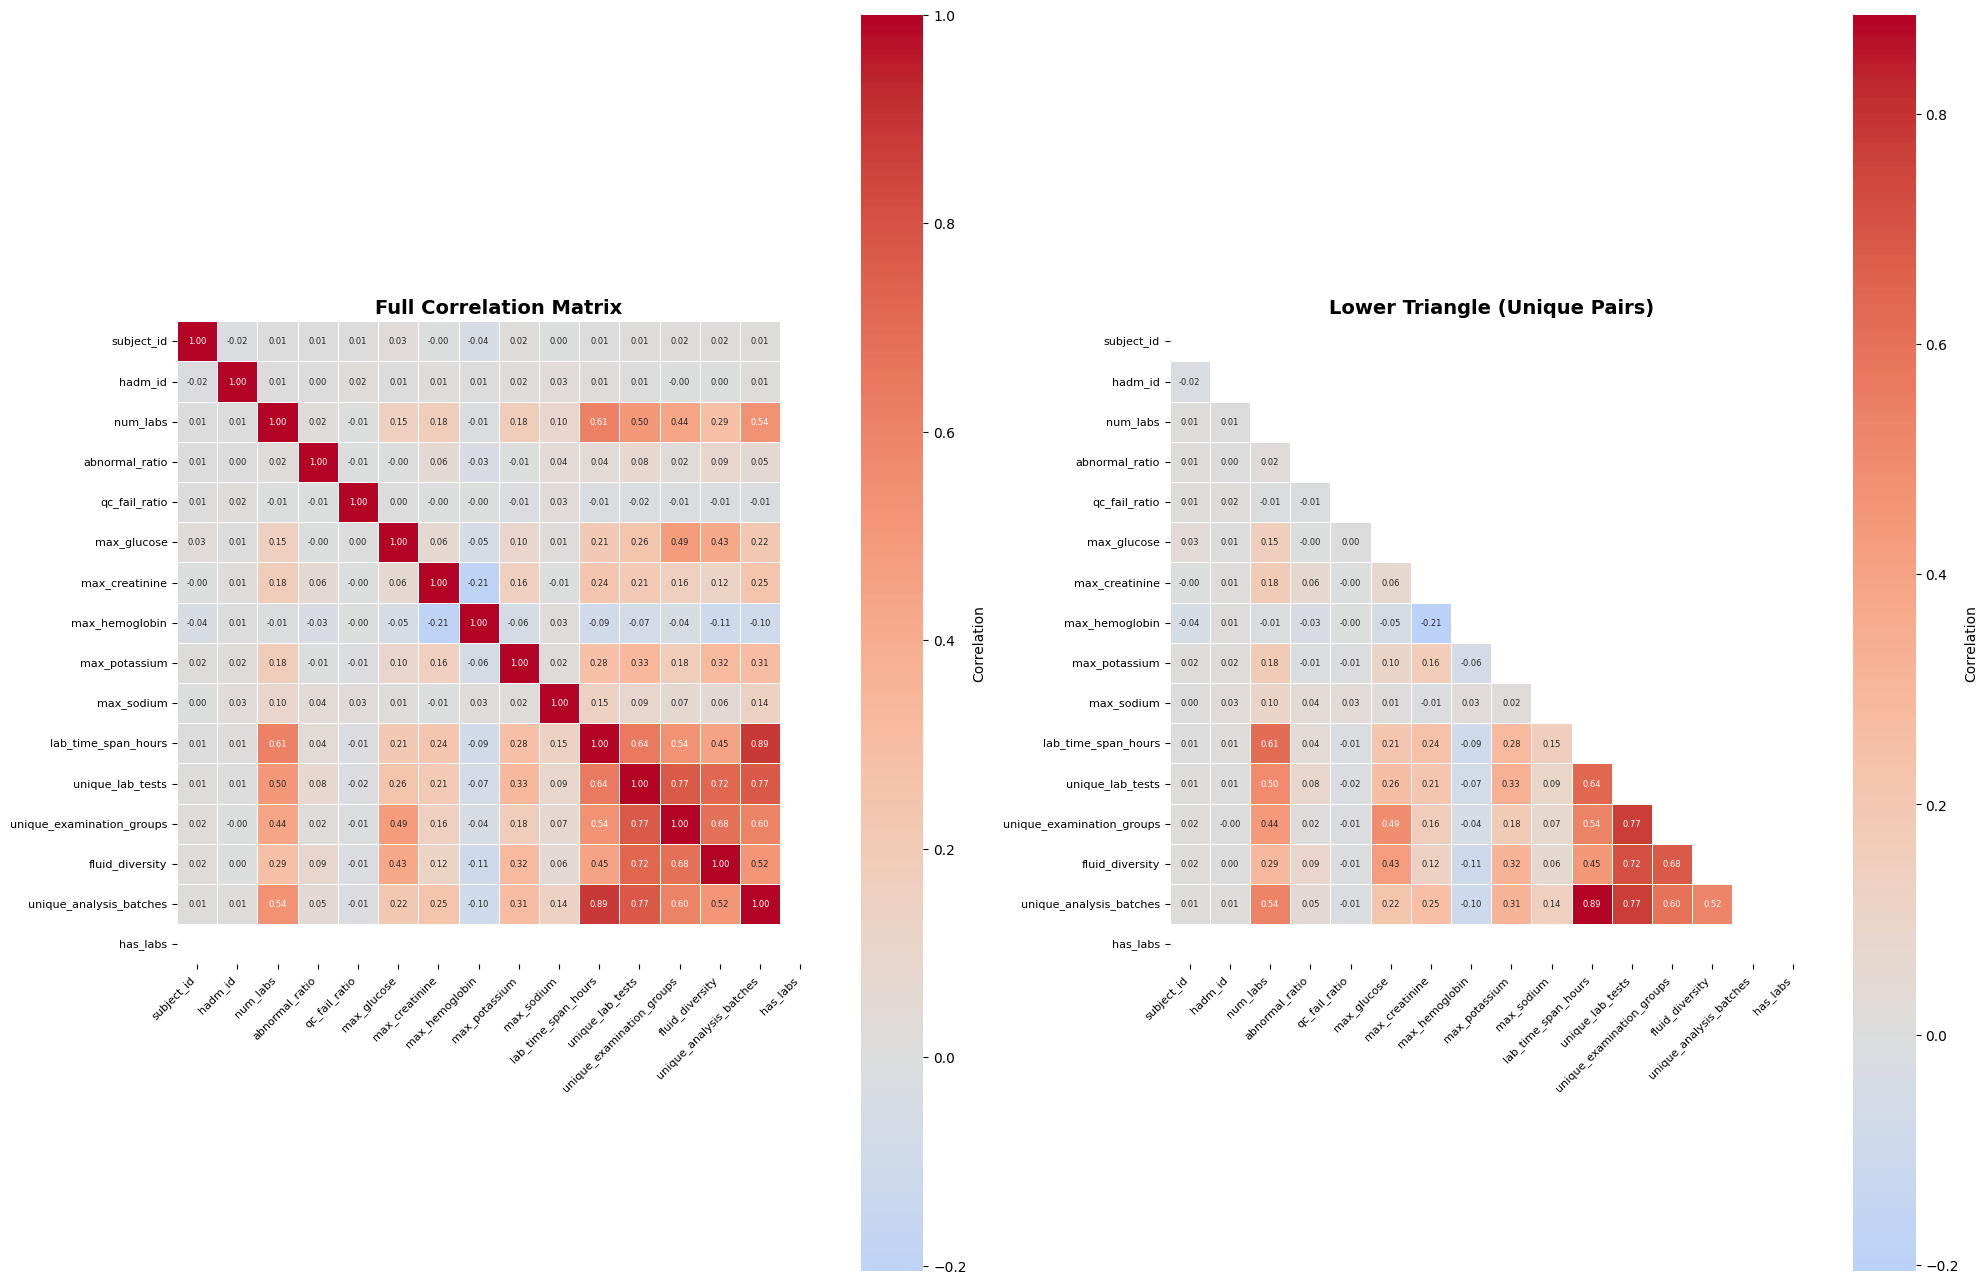

STRONG CORRELATIONS (|r| > 0.7, excluding self-correlations)

Found 4 highly correlated pairs:



,Variable 1,Variable 2,Correlation,Strength
0,lab_time_span_hours,unique_analysis_batches,0.886,Strong
3,unique_lab_tests,unique_analysis_batches,0.775,Strong
1,unique_lab_tests,unique_examination_groups,0.770,Strong
2,unique_lab_tests,fluid_diversity,0.723,Strong



💡 Consider removing one variable from each pair to reduce multicollinearity

MODERATE CORRELATIONS (0.5 < |r| ≤ 0.7)

Found 8 moderately correlated pairs:



,Variable 1,Variable 2,Correlation
5,unique_examination_groups,fluid_diversity,0.683
3,lab_time_span_hours,unique_lab_tests,0.641
0,num_labs,lab_time_span_hours,0.614
6,unique_examination_groups,unique_analysis_batches,0.600
2,num_labs,unique_analysis_batches,0.538
4,lab_time_span_hours,unique_examination_groups,0.537
7,fluid_diversity,unique_analysis_batches,0.524
1,num_labs,unique_lab_tests,0.505


In [ ]:
numeric_cols = feat.select_dtypes(include='number').columns
corr = feat[numeric_cols].corr()

# Create figure with two views
fig, axes = plt.subplots(1, 2, figsize=(20, 16))

# Plot 1: Full heatmap with annotations
ax1 = axes[0]
sns.heatmap(corr, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=0.5,
            annot_kws={'size': 6},
            cbar_kws={'label': 'Correlation', 'shrink': 0.8},
            ax=ax1)
ax1.set_title('Full Correlation Matrix', fontsize=14, fontweight='bold')
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=8)
plt.setp(ax1.get_yticklabels(), rotation=0, fontsize=8)

# Plot 2: Lower triangle only (cleaner view)
ax2 = axes[1]
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=0.5,
            mask=mask,
            annot_kws={'size': 6},
            cbar_kws={'label': 'Correlation', 'shrink': 0.8},
            ax=ax2)
ax2.set_title('Lower Triangle (Unique Pairs)', fontsize=14, fontweight='bold')
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=8)
plt.setp(ax2.get_yticklabels(), rotation=0, fontsize=8)

plt.tight_layout()
plt.savefig(r'../plots/1.1_df2_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Find and display strong correlations
print("="*80)
print("STRONG CORRELATIONS (|r| > 0.7, excluding self-correlations)")
print("="*80)

strong_corr = []
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        r = corr.iloc[i, j]
        if abs(r) > 0.7:
            strong_corr.append({
                'Variable 1': corr.columns[i],
                'Variable 2': corr.columns[j],
                'Correlation': round(r, 3),
                'Strength': 'Very Strong' if abs(r) > 0.9 else 'Strong'
            })

if strong_corr:
    strong_df = pd.DataFrame(strong_corr).sort_values('Correlation', key=abs, ascending=False)
    print(f"\nFound {len(strong_corr)} highly correlated pairs:\n")
    display(strong_df)
    print("\n💡 Consider removing one variable from each pair to reduce multicollinearity")
else:
    print("\nNo correlations with |r| > 0.7 found")

# Moderate correlations
print("\n" + "="*80)
print("MODERATE CORRELATIONS (0.5 < |r| ≤ 0.7)")
print("="*80)

moderate_corr = []
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        r = corr.iloc[i, j]
        if 0.5 < abs(r) <= 0.7:
            moderate_corr.append({
                'Variable 1': corr.columns[i],
                'Variable 2': corr.columns[j],
                'Correlation': round(r, 3)
            })

if moderate_corr:
    moderate_df = pd.DataFrame(moderate_corr).sort_values('Correlation', key=abs, ascending=False)
    print(f"\nFound {len(moderate_corr)} moderately correlated pairs:\n")
    display(moderate_df)
else:
    print("\nNo moderate correlations found")

In [ ]:
len(feat.columns), feat.columns

(16,
 Index(['subject_id', 'hadm_id', 'num_labs', 'abnormal_ratio', 'qc_fail_ratio',
        'max_glucose', 'max_creatinine', 'max_hemoglobin', 'max_potassium',
        'max_sodium', 'lab_time_span_hours', 'unique_lab_tests',
        'unique_examination_groups', 'fluid_diversity',
        'unique_analysis_batches', 'has_labs'],
       dtype='object'))

In [ ]:
    features_to_keep = [
        # identifiers
        'subject_id', 'hadm_id',
        'num_labs',
        'abnormal_ratio',
        'qc_fail_ratio',
        'lab_time_span_hours', 'unique_lab_tests',
        'max_glucose', 'max_creatinine', 'min_hemoglobin', 'max_potassium', 'max_sodium', 
        'has_labs'
    ]

    # Filter to only keep columns that exist in feat
    features_to_keep = [col for col in features_to_keep if col in feat.columns]
    feat_reduced = feat[features_to_keep]

    print(f"Reduced from {len(feat.columns)} to {len(feat_reduced.columns)} columns")
    feat_reduced.columns

Reduced from 16 to 13 columns


Index(['subject_id', 'hadm_id', 'num_labs', 'abnormal_ratio', 'qc_fail_ratio',
       'lab_time_span_hours', 'unique_lab_tests', 'max_glucose',
       'max_creatinine', 'max_hemoglobin', 'max_potassium', 'max_sodium',
       'has_labs'],
      dtype='object')

In [ ]:
feat_reduced.to_csv(f"{DATA_DIR}/{DATASETS[name].replace('.csv', '_agg_features_large.csv')}", index=False)

In [ ]:
features_to_keep = [
        # identifiers
        'subject_id', 'hadm_id', 
        'num_labs',
        'abnormal_ratio',
        'qc_fail_ratio',
        'lab_time_span_hours',
        'unique_lab_tests',
        'max_glucose', 
        'max_creatinine',
        'min_hemoglobin', 'max_potassium', 'max_sodium', 
        'has_labs'
    ]

# Filter to only keep columns that exist in feat
features_to_keep = [col for col in features_to_keep if col in feat_reduced.columns]
feat_reduced = feat_reduced[features_to_keep]

print(f"Reduced to {len(feat_reduced.columns)} columns")
feat_reduced.columns

Reduced to 13 columns


Index(['subject_id', 'hadm_id', 'num_labs', 'abnormal_ratio', 'qc_fail_ratio',
       'lab_time_span_hours', 'unique_lab_tests', 'max_glucose',
       'max_creatinine', 'max_hemoglobin', 'max_potassium', 'max_sodium',
       'has_labs'],
      dtype='object')

## Save SLim

In [ ]:
feat_reduced.to_csv(f"{DATA_DIR}/{DATASETS[name].replace('.csv', '_agg_features.csv')}", index=False)